# Maaş Değişim Aralığının Şirket Profesyonelliğine Etkisi

Bu çalışma, bir şirketin maaş değişim aralığının, profesyonellik ve istikrar üzerindeki etkilerini incelemektedir. Dar maaş değişim aralıklarının öngörülebilirlik, şeffaflık ve profesyonellik sağlarken, motivasyon ve rekabetçilik gibi potansiyel dezavantajları da barındırabileceği analiz edilmektedir. Çalışma, maaş aralığının profesyonelliğin tek bir göstergesi olup olmadığı ve diğer önemli faktörlerle birlikte değerlendirilmesi gerektiğini vurgular.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\realb\Desktop\değişim aralığı\Employee_Salaries.csv")

### Veriye ilk bakış

In [3]:
df.head()

,Department,Department_Division,PCN,Position_Title,FLSA_Code,Initial_Hire_Date,Date_in_Title,Salary,OBJECTID
0,AGR,AGR 001 Directors Office,B.001326.1,Administrative Specialist II,NaN,10-Sep-84,1-Mar-18,71919.64,288053
1,AGR,AGR 001 Directors Office,B.003590,Rural Community Coordinator,NaN,16-Aug-03,7-Dec-16,94556.02,288054
2,AGR,AGR 001 Directors Office,B.004807,Director of Agriculture,NaN,1-Oct-08,1-Oct-08,151613.54,288055
3,AGR,AGR 010 Cooperative Extension Program,B.001801.1,Administrative Assistant,NaN,1-Feb-11,29-Jul-21,44101.72,288056
4,AGR,AGR 010 Cooperative Extension Program,I.080043,Administrative Intern II,NaN,9-May-24,NaN,16.00,288057


In [4]:
df.tail()

,Department,Department_Division,PCN,Position_Title,FLSA_Code,Initial_Hire_Date,Date_in_Title,Salary,OBJECTID
7802,TRE,TRE 020 City Treasurer,B.002572.1,Treasury Specialist III,NaN,16-Apr-14,6-Apr-23,50284.0,295855
7803,TRE,TRE 020 City Treasurer,B.007634.1,Treasury Specialist I,NaN,24-Mar-22,21-Sep-23,42001.7,295856
7804,TRE,TRE 020 City Treasurer,B.003485.1,Treasury Specialist III,NaN,16-Jul-99,22-Oct-16,61911.2,295857
7805,TRE,TRE 020 City Treasurer,B.000335.1,Treasury Services Supervisor,NaN,16-Jul-04,4-Jan-18,64594.4,295858
7806,TRE,TRE 020 City Treasurer,B.007633.1,Treasury Specialist II,NaN,23-Apr-20,11-Aug-22,41089.1,295859


In [5]:
df.isnull().sum()

Department                0
Department_Division       0
PCN                       0
Position_Title            0
FLSA_Code              7807
Initial_Hire_Date         0
Date_in_Title          1323
Salary                    0
OBJECTID                  0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLSA_Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,7807.0,54237.811817,35088.030427,13.461625,37269.18,55063.58,75429.12,402412.92
OBJECTID,7807.0,291956.000000,2253.831109,288053.000000,290004.50,291956.00,293907.50,295859.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Department           7807 non-null   object 
 1   Department_Division  7807 non-null   object 
 2   PCN                  7807 non-null   object 
 3   Position_Title       7807 non-null   object 
 4   FLSA_Code            0 non-null      float64
 5   Initial_Hire_Date    7807 non-null   object 
 6   Date_in_Title        6484 non-null   object 
 7   Salary               7807 non-null   float64
 8   OBJECTID             7807 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 549.1+ KB


In [12]:
df.shape

(7807, 9)

In [14]:
df.columns

Index(['Department', 'Department_Division', 'PCN', 'Position_Title',
       'FLSA_Code', 'Initial_Hire_Date', 'Date_in_Title', 'Salary',
       'OBJECTID'],
      dtype='object')

### Veri görselleştirme

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [34]:
warnings.filterwarnings("ignore")

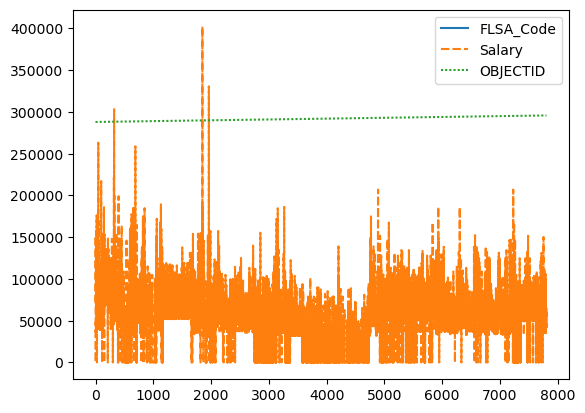

In [35]:
sns.lineplot(df);

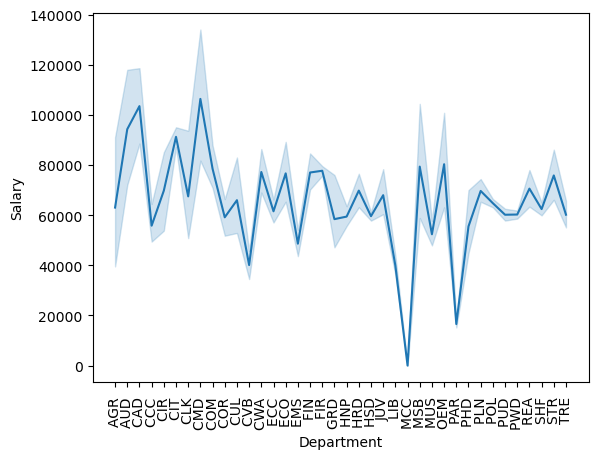

In [36]:
sns.lineplot(x="Department", y="Salary", data=df)
plt.xticks(rotation=90)
plt.show()

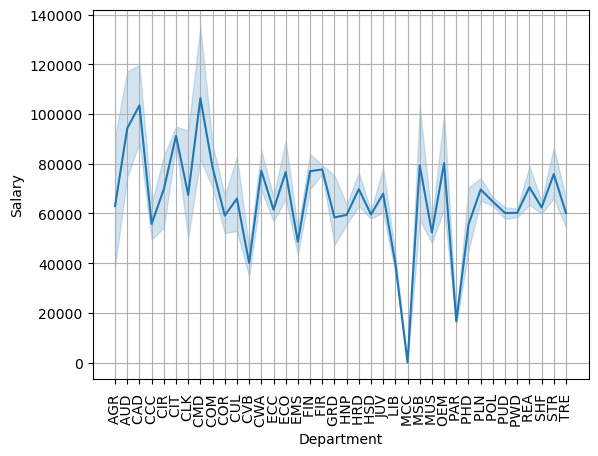

In [37]:
sns.lineplot(x="Department", y="Salary", data=df, palette="viridis");
plt.xticks(rotation=90);
plt.grid(True);
plt.show();

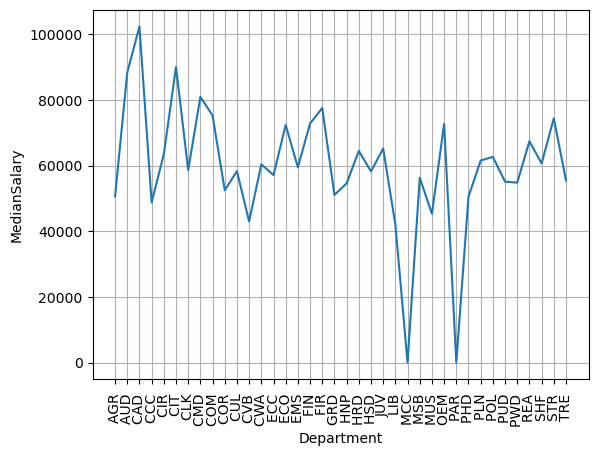

In [39]:
# Burda aykırı durum olabileçeğini düşünüyorum o yüzden medyanını olıp onun üzerinde bakalım.

# Medyan değerlerini hesapla
median_df = df.groupby("Department")["Salary"].median().reset_index()
median_df = median_df.rename(columns={"Salary": "MedianSalary"})

# Medyan verilerini çizgi grafiğinde göster
sns.lineplot(x="Department", y="MedianSalary", data=median_df, palette="viridis")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

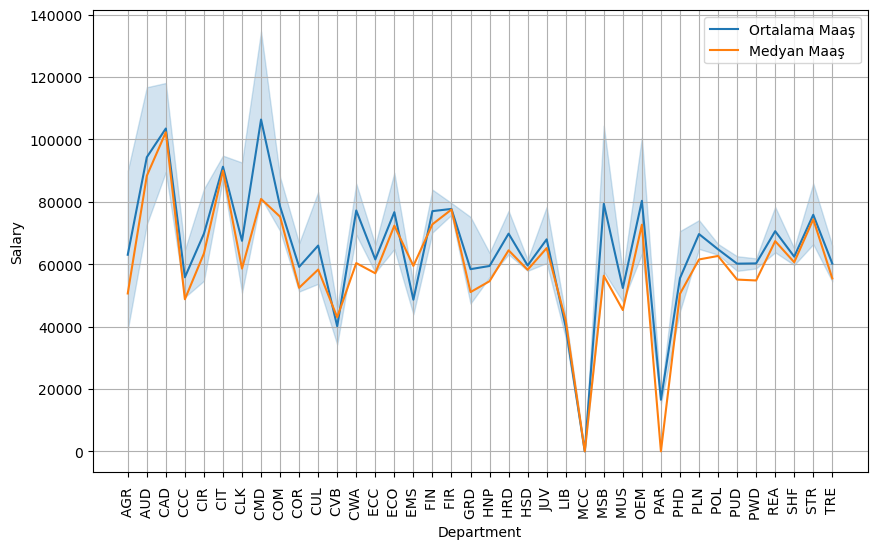

In [41]:
# İki grafiği aynı anda inceleyelim.

# Medyan değerlerini hesapla
median_df = df.groupby("Department")["Salary"].median().reset_index()
median_df = median_df.rename(columns={"Salary": "MedianSalary"})

# Grafik oluştur
plt.figure(figsize=(10, 6))

# Ortalama maaşları çiz
sns.lineplot(x="Department", y="Salary", data=df, palette="Blues", label="Ortalama Maaş")

# Medyan maaşları çiz
sns.lineplot(x="Department", y="MedianSalary", data=median_df, palette="Reds", label="Medyan Maaş")

# X eksenindeki etiketleri dik konuma getir
plt.xticks(rotation=90)

# Izgara çizgilerini ekle
plt.grid(True)

# Efsane ekle
plt.legend()

# Grafik göster
plt.show()


# Evet burda düşündüğüm doğru oluduğunu görüyorum bazı departmanlarda maaş durumları aykırı değerler ortalmayı artı ve eksi
#değiştirilebilir.

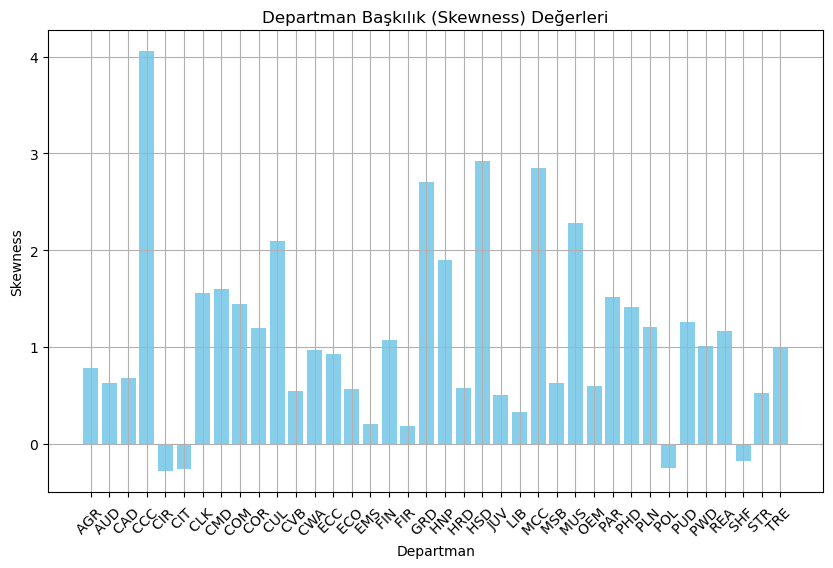

In [45]:
from scipy.stats import skew


# basıklık hesaplaması yapalım.

# Her departman için basıklığı hesapla
skewness_df = df.groupby("Department")["Salary"].apply(lambda x: skew(x, nan_policy='omit')).reset_index()
skewness_df = skewness_df.rename(columns={"Salary": "Skewness"})

# Görselleştirme
plt.figure(figsize=(10, 6))

# Çubuk grafiği oluştur
plt.bar(skewness_df["Department"], skewness_df["Skewness"], color='skyblue')

# Başlık ve etiketler
plt.title('Departman Başkılık (Skewness) Değerleri')
plt.xlabel('Departman')
plt.ylabel('Skewness')

# X eksenindeki etiketleri dik konuma getir
plt.xticks(rotation=45)

# Izgara çizgilerini ekle
plt.grid(True)

# Grafik göster
plt.show()

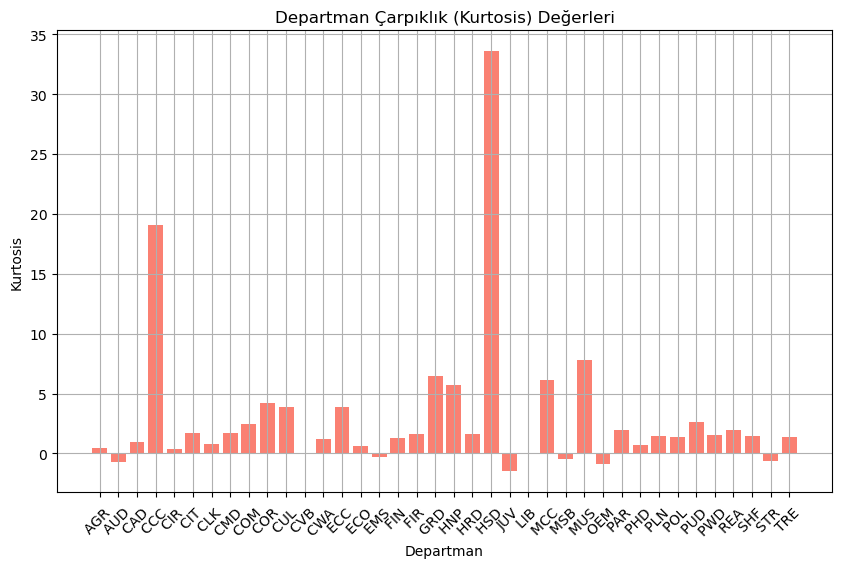

In [47]:
from scipy.stats import kurtosis

# Çarpıklık hesaplaması yapalım.

# Her departman için çarpıklığı hesapla
kurtosis_df = df.groupby("Department")["Salary"].apply(lambda x: kurtosis(x, nan_policy='omit')).reset_index()
kurtosis_df = kurtosis_df.rename(columns={"Salary": "Kurtosis"})

# Görselleştirme
plt.figure(figsize=(10, 6))

# Çubuk grafiği oluştur
plt.bar(kurtosis_df["Department"], kurtosis_df["Kurtosis"], color='salmon')

# Başlık ve etiketler
plt.title('Departman Çarpıklık (Kurtosis) Değerleri')
plt.xlabel('Departman')
plt.ylabel('Kurtosis')

# X eksenindeki etiketleri dik konuma getir
plt.xticks(rotation=45)

# Izgara çizgilerini ekle
plt.grid(True)

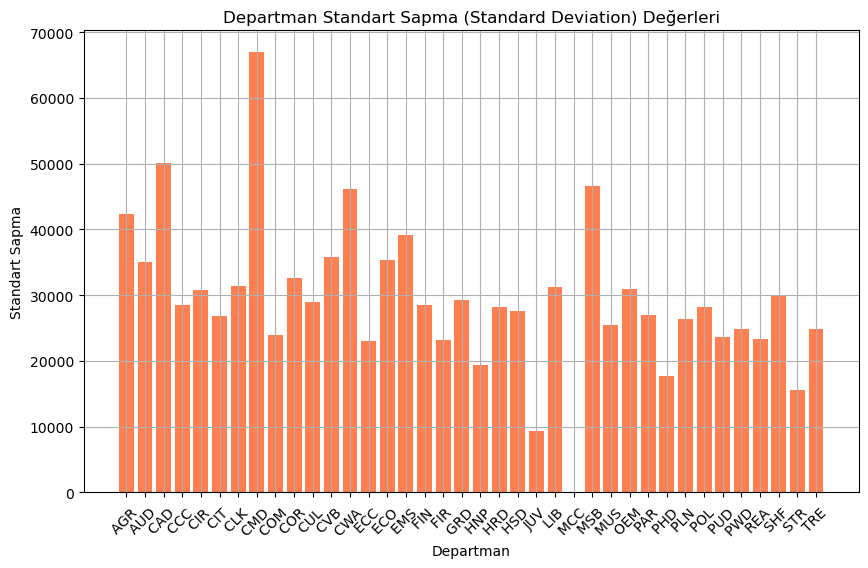

In [48]:
# Departmanların standart sapması.

# Her departman için standart sapmayı hesapla
std_dev_df = df.groupby("Department")["Salary"].std().reset_index()
std_dev_df = std_dev_df.rename(columns={"Salary": "StandardDeviation"})

# Görselleştirme
plt.figure(figsize=(10, 6))

# Çubuk grafiği oluştur
plt.bar(std_dev_df["Department"], std_dev_df["StandardDeviation"], color='coral')

# Başlık ve etiketler
plt.title('Departman Standart Sapma (Standard Deviation) Değerleri')
plt.xlabel('Departman')
plt.ylabel('Standart Sapma')

# X eksenindeki etiketleri dik konuma getir
plt.xticks(rotation=45)

# Izgara çizgilerini ekle
plt.grid(True)

# Grafik göster
plt.show()

### Değişim aralığına bakalım

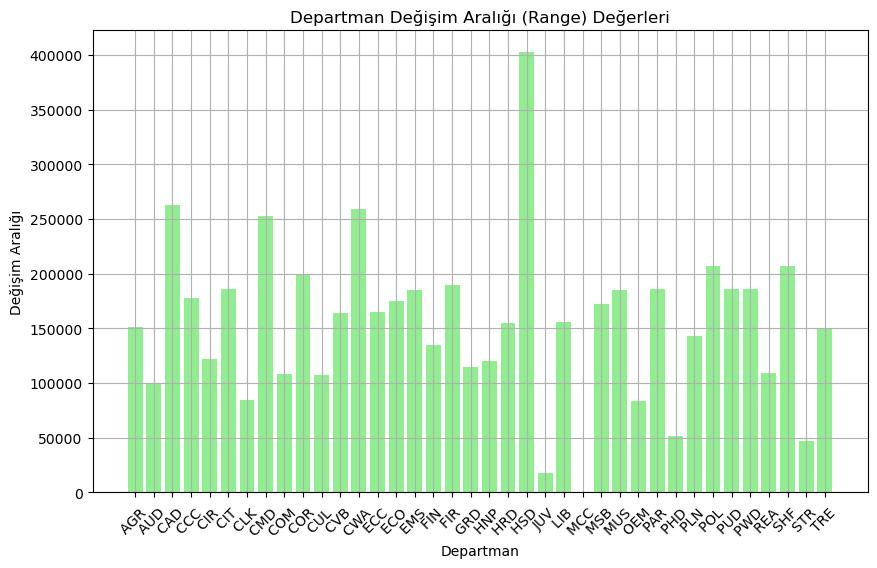

In [49]:
# Her departman için değişim aralığını hesapla
range_df = df.groupby("Department")["Salary"].apply(lambda x: x.max() - x.min()).reset_index()
range_df = range_df.rename(columns={"Salary": "Range"})

# Görselleştirme
plt.figure(figsize=(10, 6))

# Çubuk grafiği oluştur
plt.bar(range_df["Department"], range_df["Range"], color='lightgreen')

# Başlık ve etiketler
plt.title('Departman Değişim Aralığı (Range) Değerleri')
plt.xlabel('Departman')
plt.ylabel('Değişim Aralığı')

# X eksenindeki etiketleri dik konuma getir
plt.xticks(rotation=45)

# Izgara çizgilerini ekle
plt.grid(True)

# Grafik göster
plt.show()

## Avantajlar

- **Öngörülebilirlik ve İstikrar:** Maaş değişim aralığının dar olması, çalışanların maaşlarının daha öngörülebilir ve stabil olduğunu gösterebilir. Bu, çalışanlar arasında daha az finansal belirsizlik ve stres anlamına gelebilir, bu da genel memnuniyeti artırabilir.

- **Şeffaflık ve Adalet:** Düşük maaş değişim aralığı, maaş belirleme süreçlerinde daha fazla şeffaflık ve adalet olduğunu gösterebilir. Çalışanlar, performanslarının doğrudan maaşlarına yansıdığını görebilirler.

- **Profesyonellik ve İstikrar:** Daha dar bir maaş aralığı, şirketin profesyonellik standartlarına sahip olduğunu ve maaşların piyasa normlarına göre düzenlendiğini gösterebilir.

## Dezavantajlar

- **Motivasyon ve Performans:** Dar maaş değişim aralığı, çalışanların performanslarına göre ödüllendirilme fırsatlarını kısıtlayabilir. Bu, bazı çalışanların motivasyonunu azaltabilir, çünkü performanslarına bağlı olarak büyük bir maaş artışı bekleyemezler.

- **Pazar Rekabeti:** Maaş değişim aralığının dar olması, şirketin sektördeki rekabetçi maaş teklifleriyle uyumlu olmayabilir. Rekabetçi maaşlar genellikle yetenekli çalışanları çekmek ve elde tutmak için önemlidir.

- **Çeşitli Rol ve Sorumluluklar:** Çalışanların çeşitli roller ve sorumluluklara sahip olduğu durumlarda, maaş değişim aralığının dar olması, farklı görev ve sorumlulukları olan çalışanlar arasında adaletsizlik hissine yol açabilir.

## Sonuç

Maaş değişim aralığının profesyonelliğin bir göstergesi olup olmadığı, sadece bu tek faktöre dayanarak net bir şekilde belirlenemez. Şirketlerin profesyonelliğini değerlendirirken, maaş değişim aralığının yanı sıra, şeffaflık, adil ödüllendirme sistemleri, çalışan memnuniyeti, eğitim ve gelişim fırsatları gibi birçok faktörü de göz önünde bulundurmak önemlidir.


# Genel proje analızi;

- Burda departman departman bakılmalı ve departmanlardaki avantaj ve dezavantajları göz önünde bulunarak departamlarda mmaş düzenlemesi yapılmalı çalışan ve iş veren mutlu olcağı alanda belirlenmeli.
- Bu örnekte bazı departmanlar bu dengeyi kurmuşken bazı departmanlar bu dengeyi sağlayamamış.